## Lab 10:딥러닝으로 MNIST 98%이상 해보기

### 사용할 모듈 추가

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### MNIST 데이터 불러오기

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Neural Network for MNIST

### 상수 정의

In [3]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

### 입력값 placeholder 선언

In [4]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

### Neural Network 구성

In [5]:
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

### 손실함수와 최적화 방법 정의

In [6]:
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=hypothesis, labels=Y
    )
)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

### Session 초기화

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

### 모델 학습 진행

In [8]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch: 0001 cost = 187.910582546
Epoch: 0002 cost = 41.189442618
Epoch: 0003 cost = 25.395669767
Epoch: 0004 cost = 17.342745870
Epoch: 0005 cost = 12.558759838
Epoch: 0006 cost = 9.224472596
Epoch: 0007 cost = 6.781220234
Epoch: 0008 cost = 5.127944851
Epoch: 0009 cost = 3.753746452
Epoch: 0010 cost = 2.926846895
Epoch: 0011 cost = 2.052496516
Epoch: 0012 cost = 1.621714355
Epoch: 0013 cost = 1.223579477
Epoch: 0014 cost = 0.949317447
Epoch: 0015 cost = 0.747378245
Learning Finished!


### 모델 테스트 및 정확도 확인

In [9]:
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(
    'Accuracy:', 
    sess.run(
        accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
    )
)

Accuracy: 0.9476


### 임의의 정수 예측하기

In [10]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print(
    "Prediction: ", 
    sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r+1]}
    )
)

Label:  [8]
Prediction:  [8]


### 예측한 정수 그리기

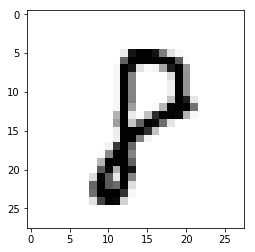

In [11]:
plt.imshow(
    mnist.test.images[r:r + 1].reshape(28, 28), 
    cmap='Greys', interpolation='nearest'
)
plt.show()